# Lotka Volterra Simulation

In [1]:
import matplotlib.pyplot as plt

Lets say you wanted to understand how a predator population effects a prey population, and visa versa. The Lotka Volterra equations describe this situation, but solving those equations involves knowledge of differential equations. Lets see how to do it without the hard math, or even knowing the equations in the first place!
***
First, lets think about our mental model for how this system works:

We have a population of prey, lets call that population size `num_prey`. We also have a population of predators, we can call the predators population size `num_pred`. We will also thinking about time happening in descrete steps to make our lives easier.

The prey makes babies, as all biological things do, and reproduces at a rate we'll call `r_prey`. This means each prey individual will produce `r_prey` individuals in the next step. So the size of the prey population in the next step `num_prey_next` is just `nump_prey + (num_prey * r_prey)`.

Of course, they prey get eaten by the predators. Each predator is only so good at eating prey, so we will call the predator efficiency `e_catch`. If there are more prey running around, it gets easier for the predators to catch them, therefore how many prey a predator eats also depends on `num_prey`, so we will say the number eaten by a single predator is `e_catch * num_prey`. The total number of prey eaten by the predator population is then `e_catch * num_prey * num_pred`.

So to get the number of prey in the next generation, we just subtract the number of prey eaten from the number of prey born and add this to the current population: `num_prey_next = num_prey + (num_prey * r_prey) - (e_catch * num_prey * num_pred)`


Now if we think about the growth of the predator population, they can only make new babies in proportion to the number of prey they can catch - no food = no babies. We'll say that not all of the prey biomass caught can actually be converted into predator babies -some just comes out as poo- so the efficieny of the prey to predator conversion is `e_convert`. The amount of prey that can be turned into predator is then the converstion rate times the number of prey caught: `e_convert * (num_prey * e_catch)`. This is on a per-predator basis, so the number of predators born is then `e_convert * (num_prey * e_catch) * num_pred`.

Since these predators dont have any predators themselves, they die from natural causes at a rate of `d_pred`. Therefore the number of predators lost is then `d_pred * num_pred`. Combining with predator births, the number of predators in the next generation is then `num_pred_next = num_pred + (e_convert * (num_prey * e_catch) * num_pred) - (d_pred * num_pred)`

Putting everything together gives us the simulation below:

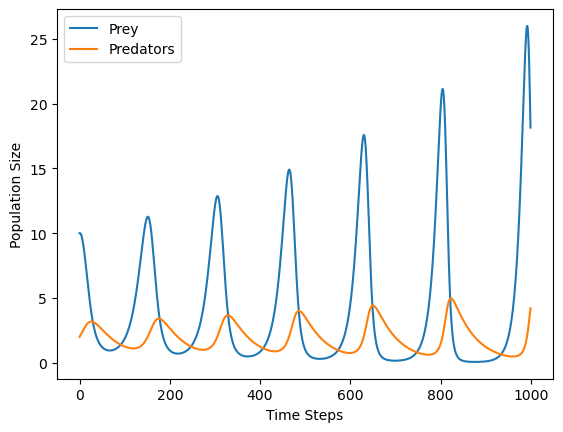

In [2]:
time_steps = 1000

num_prey = 10
num_pred = 2

r_prey = 0.1
e_catch = 0.05
e_convert = 0.1
d_pred = 0.02

prey_size = []
pred_size = []
for gen in range(time_steps):
    prey_size.append(num_prey)
    pred_size.append(num_pred)
    
    num_prey_next = num_prey + (num_prey * r_prey) - (e_catch * num_prey * num_pred)
    num_pred_next = num_pred + (e_catch * num_prey * e_convert * num_pred) - (d_pred * num_pred)

    num_prey = max(num_prey_next,0)
    num_pred = max(num_pred_next,0)

plt.plot(range(time_steps),prey_size, label='Prey')
plt.plot(range(time_steps),pred_size, label='Predators')
plt.xlabel('Time Steps')
plt.ylabel('Population Size')
plt.legend()